In [28]:
import random

def influence_maximization(nodes, edges, weights, k):
    seed_set = set()

    while len(seed_set) < k:
        max_node = None
        max_influence = -1

        for node in nodes:
            if node not in seed_set:
                influence = calculate_influence(node, seed_set, nodes, edges, weights)
                if influence > max_influence:
                    max_influence = influence
                    max_node = node

        seed_set.add(max_node)

    return seed_set

def calculate_influence(node, seed_set, nodes, edges, weights):
    activated_nodes = set()
    activated_nodes.add(node)
    new_activated = set()

    while new_activated:
        for activated_node in new_activated:
            for neighbor in edges[activated_node]:
                if neighbor not in activated_nodes:
                    threshold = random.uniform(0, 1)
                    weight_sum = sum(weights[neighbor][activated_neighbor] for activated_neighbor in activated_nodes)

                    if weight_sum >= threshold:
                        activated_nodes.add(neighbor)

        new_activated = activated_nodes - new_activated

    return len(activated_nodes)

# Example usage
nodes = ['A', 'B', 'C', 'D']
edges = {'A': ['B', 'C'], 'B': ['C', 'D'], 'C': ['D'], 'D': []}
weights = {'A': {'B': 0.6, 'C': 0.8}, 'B': {'C': 0.4, 'D': 0.5}, 'C': {'D': 0.7}, 'D': {}}
k = 2

seed_set = influence_maximization(nodes, edges, weights, k)
print(seed_set)



{'A', 'B'}


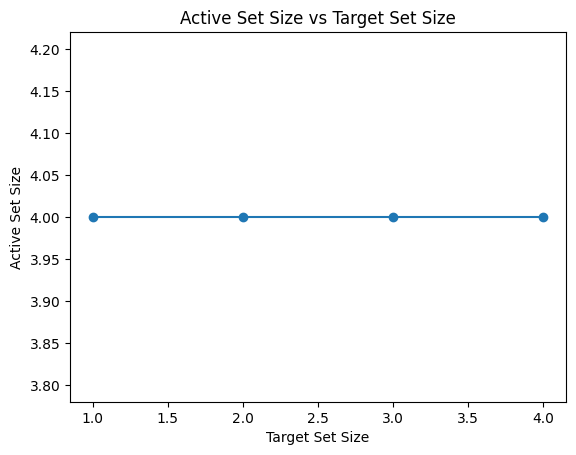

In [29]:
import random
import matplotlib.pyplot as plt

def linear_threshold_model(graph, thresholds, weights, seed_set):
    active_set = set(seed_set)
    new_active_set = set()

    while True:
        for node in graph:
            if node in active_set:
                continue

            total_weight = sum(weights[node][neighbor] for neighbor in graph[node] if neighbor in active_set)
            if total_weight >= thresholds[node]:
                new_active_set.add(node)

        if not new_active_set:
            break

        active_set.update(new_active_set)
        new_active_set.clear()

    return active_set

def influence_maximization(graph, thresholds, weights, k):
    seeds = set()

    for _ in range(k):
        max_influence = -1
        max_node = None

        for node in graph:
            if node not in seeds:
                seeds.add(node)
                influence = len(linear_threshold_model(graph, thresholds, weights, seeds))
                seeds.remove(node)

                if influence > max_influence:
                    max_influence = influence
                    max_node = node

        seeds.add(max_node)

    return seeds

# Example usage
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['C', 'D'],
    'C': ['D'],
    'D': []
}

thresholds = {
    'A': 0.5,
    'B': 0.7,
    'C': 0.3,
    'D': 0.6
}

weights = {
    'A': {'B': 0.2, 'C': 0.3, 'D': 0.5},
    'B': {'C': 0.4, 'D': 0.1},
    'C': {'D': 0.6},
    'D': {}
}

k = 2

target_set_sizes = []
active_set_sizes = []

for i in range(1, len(graph) + 1):
    target_set_sizes.append(i)
    seeds = influence_maximization(graph, thresholds, weights, k)
    active_set_sizes.append(len(linear_threshold_model(graph, thresholds, weights, seeds)))

plt.plot(target_set_sizes, active_set_sizes, marker='o')
plt.xlabel('Target Set Size')
plt.ylabel('Active Set Size')
plt.title('Active Set Size vs Target Set Size')
plt.show()
